## Dirichlet Distribution:

the $Dirichlet$  distribution is the $conjugate$ of the $multinomilal$ distribution(generation of the $binomial$ distribution) that's giveen by the following expression:

$~~~~~~~~~~~~~~~~~~~~$ $Dir(\mu/\alpha)=\dfrac{\gamma(\alpha_{0})}{\gamma(\alpha_{1})...\gamma(\alpha_{K})}\displaystyle \prod_{k=1}^{K}\mu_{k}^{\alpha_{k}-1}~~(1)$

where:

$\alpha_{i}$ are the $parameters$ that control the $shape$ of the distribution .

for all $ i \in {1,2,..., K}$ we have:
$~~~~~~~~~~~~~~~~~$ $\mu_{k}>=0$ 

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\displaystyle \sum_{k=1}^{K}\mu_{k}=1$

we can implement it as $class$ model:

In [6]:
import numpy as np
# importing the base function gamma
from scipy.special import gamma


class dirichlet:

    def __init__(self, alpha):
        """ alpha is the hyperparameter that control the distribution """
        self._alpha = alpha
        # we make sure that _alpha is numpy.array
        assert isinstance(alpha, np.ndarray)
        # alpha_0 is sum of all alpha_{k}
        self._alpha_0 = alpha.sum()

    # the decorator poperty give us the possibility to change(setter method) ,
    # getting(getter method) the values of intances(e,g alpha) or even deleter method

    @property
    # getter method
    def alpha(self):
        return self._alpha

    # setter method
    @alpha.setter
    def alpha(self, val):
        self._alpha = val
        return self._alpha

    # deleter method
    @alpha.deleter
    def alpha_del(self):
        del self._alpha

    def _pdf(self, mu):
        # mu must be numpy.ndarray
        assert isinstance(mu, np.ndarray)
        # all component of mu must be positive
        assert (mu >= 0).all()
        # sum of components of mu must be equal one
        #assert mu.sum() == 1
        # we cacul firstly the firt term of the (1) that indepent of mu
        beta = gamma(self._alpha_0) / gamma(self._alpha).prod()
        # we calcul the second term
        mu_power_alpgha_1 = mu ** (self._alpha - 1).prod()
        return beta*mu_power_alpgha_1




alpha = np.array([5, 2, 3])
mu = np.array([0/3, 2/3, 1/3])

Direchlet = dirichlet(alpha)
print(Direchlet._pdf(mu))
    

[  0.         294.97942387   1.15226337]


## Ploting the dirichlet distribution:

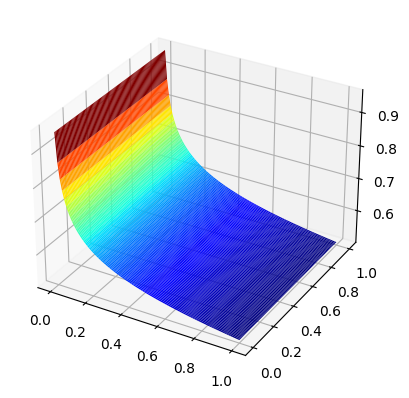

In [8]:
import numpy as np
#surpress unnecessary warnings 
import sys
if not sys.warnoptions:
   import warnings
   warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

mu1=np.linspace(0, 1, 100)
mu2=1-mu1       # due mu1+mu2=1

MU1, MU2=np.meshgrid(mu1, mu2)
alpha = np.array([1.25, 0.45])
Direchlet = dirichlet(alpha)
#MU=np.stack((mu1, 1-mu1) , axis=-1)

Z=Direchlet._pdf(np.stack((MU1, MU2) , axis=-1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(MU1, MU2, Z[:, :, :-1].reshape(len(mu1), len(mu1)), rstride=1, cstride=1,cmap='jet', edgecolor = 'none')
